In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = 'D:\Projects\cnn-based-plant-disease-classification\data_folder'
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_PATH,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# Get all class names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# Explore dataset
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)
    print(label_batch.numpy())

(32, 256, 256, 3)
tf.Tensor([1 0 1 0 2 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 2], shape=(32,), dtype=int32)
[1 0 1 0 2 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 2]


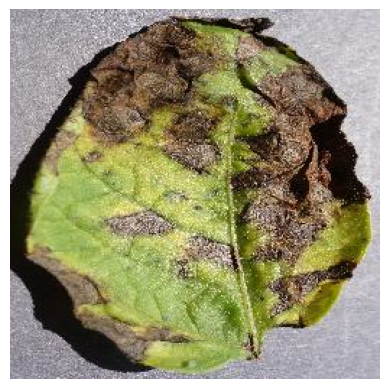

In [6]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

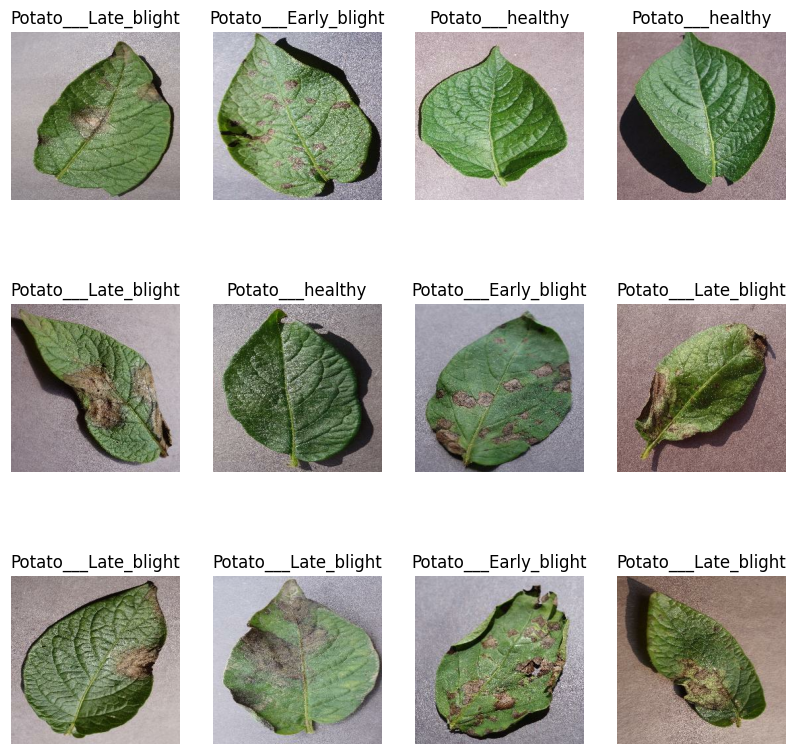

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [38]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.keras", monitor='loss', save_best_only=True)

In [ ]:
history = model.fit(dataset, batch_size=BATCH_SIZE, epochs=10, callbacks=[checkpoint])

In [16]:
train_size = 0.8
# No of image batches to train
len(dataset)*train_size

54.400000000000006

In [17]:
train_ds = dataset.take(54)
# Skip first 54 train data and take rest for test
testing_ds = dataset.skip(54)

In [18]:
# Split remaining data into 2 for validation and test
test_ds = testing_ds.take(7)
valid_ds = testing_ds.skip(7)

In [23]:
history = model.fit(train_ds, batch_size=BATCH_SIZE, epochs=10, validation_data=valid_ds)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9977 - loss: 0.0174 - val_accuracy: 0.9950 - val_loss: 0.1099
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9994 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9767 - loss: 0.1119 - val_accuracy: 0.9750 - val_loss: 0.0901
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9860 - loss: 0.0540 - val_accuracy: 0.9200 - val_loss: 0.4313
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9876 - loss: 0.0856 - val_accuracy: 0.9800 - val_loss: 0.0662
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9937 - loss: 0.0254 - val_accuracy: 0.9900 - val_loss: 0.0340
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9955 - loss: 0.0189 - val_accuracy: 0.9950 - val_loss:

In [24]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 1.0000 - loss: 0.0024


[0.0035305749624967575, 1.0]

In [25]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [26]:
model.save('potato_class_99.h5')

In [30]:
# Load the model
import numpy as np

loaded_model = tf.keras.models.load_model('potato_class_99.h5')

image_path = 'data_folder/Potato___Early_blight/0caf6a39-3f5f-4201-a4d7-3ea35fdf1303___RS_Early.B 6762.JPG'

test_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE,IMAGE_SIZE))

test_image = tf.keras.preprocessing.image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

In [32]:
prediction = np.argmax(loaded_model.predict(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [35]:
class_names[prediction]

'Potato___Early_blight'